In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import random

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier



df = pd.read_csv('mushroom_data.csv')

In [9]:
df.head()

,Edibility,Cap_Shape,Cap_surface,Cap_color,Bruising,Odor,Gill_attachment,Gill_spacing,Gill_size,Gill_color,...,Stalk_surface_below_ring,Stalk_color_above_ring,Stalk_color_below_ring,Veil_type,Veil_color,Ring_number,Ring_type,Spore_print_color,Population,Habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [10]:
df.shape

(8416, 23)

In [11]:
df['Edibility'].value_counts()

EDIBLE       4488
POISONOUS    3928
Name: Edibility, dtype: int64

In [12]:
for col in df:
    print(df[col].value_counts())
    print('\n')

EDIBLE       4488
POISONOUS    3928
Name: Edibility, dtype: int64


CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: Cap_Shape, dtype: int64


SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: Cap_surface, dtype: int64


BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: Cap_color, dtype: int64


NO         5040
BRUISES    3376
Name: Bruising, dtype: int64


NONE        3808
FOUL        2160
FISHY        576
SPICY        576
ALMOND       400
ANISE        400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: Odor, dtype: int64


FREE        8200
ATTACHED     216
Name: Gill_attachment, dtype: int64


CLOSE      6824
CROWDED    1592
Name: Gill_spacing, dtype: int64


BROAD     5880
NARROW    2536
Name: Gill_size, dtype: int64


BUFF         1728
PINK         1556
WHITE        1232
BROWN 

In [13]:
df.drop(columns = ['Veil_type', 'Stalk_root'], inplace = True)
#could delete all rows that have '?' in the stalk root column but that would lead to losing 2480 entries which is 30%


In [111]:
label_encoder = LabelEncoder()
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])

In [112]:
df.head()

,Edibility,Cap_Shape,Cap_surface,Cap_color,Bruising,Odor,Gill_attachment,Gill_spacing,Gill_size,Gill_color,...,Stalk_surface_above_ring,Stalk_surface_below_ring,Stalk_color_above_ring,Stalk_color_below_ring,Veil_color,Ring_number,Ring_type,Spore_print_color,Population,Habitat
0,0,2,3,8,0,0,1,1,1,10,...,3,3,7,7,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,...,3,3,7,7,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,...,3,3,7,7,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,...,3,3,7,7,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,...,3,3,7,7,2,1,4,6,4,6


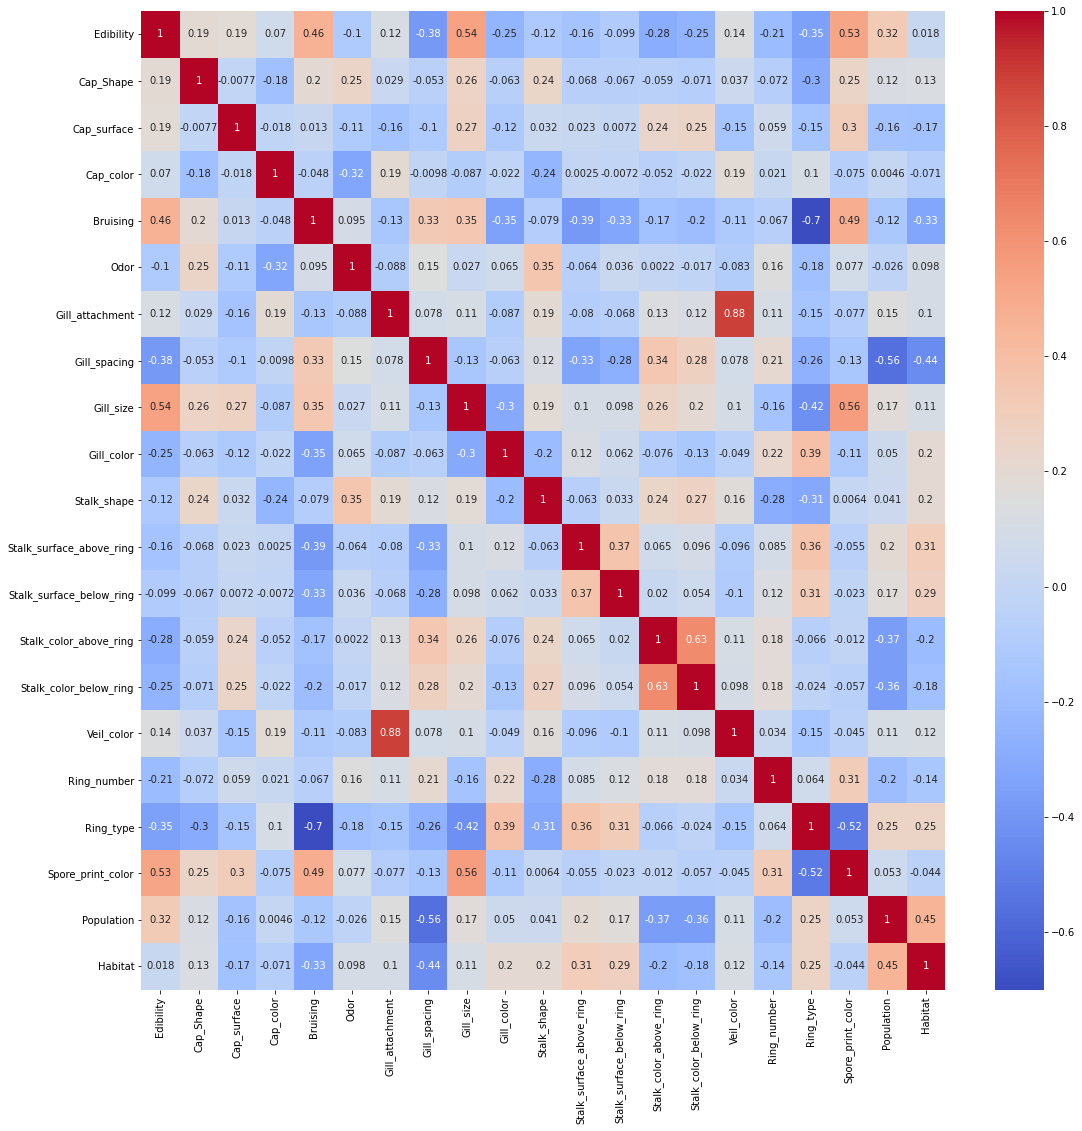

In [113]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()
#plt.savefig("heatmap.png", format = 'png', dpi = 500)

In [114]:
x = df.drop(columns = 'Edibility')
y = df['Edibility']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100, test_size = 0.2)

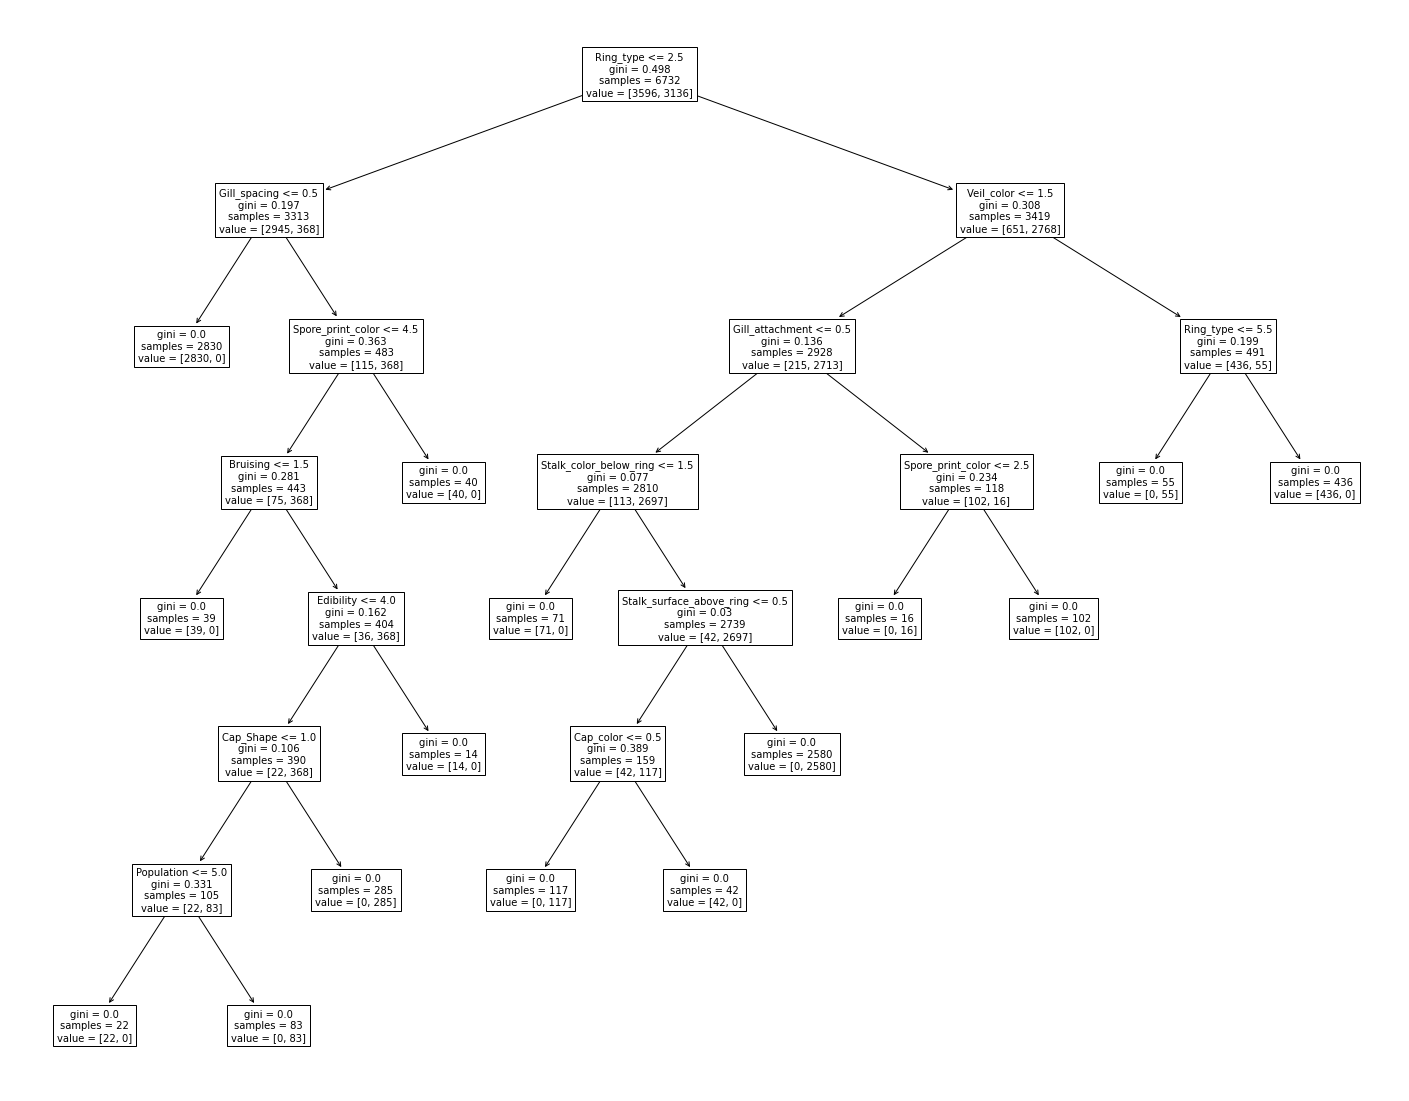

In [115]:
#Decision tree

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc, feature_names = list(df.columns), )
plt.show()

In [116]:
y_pred_dtc = dtc.predict(x_test)
print( classification_report(y_test, y_pred_dtc))
print("\n\n Accuracy: {} %" .format(round(dtc.score(x_test, y_test)*100, 2)))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       892
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



 Accuracy: 100.0 %


In [118]:
n = random.randint(0,8391) #n of rows - 25 = 8391
predictions_dtc = dtc.predict(x_test)
print("Predictions vs observed values - Decision Tree Classifier \n")
print(predictions_dtc[n:(n+25)])
print(y_test[n:(n+25)].values)

Predictions vs observed values - Decision Tree Classifier 

[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1]
[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1]


In [120]:
#Random Forest

rfc = RandomForestClassifier(n_estimators = 300, random_state = 42)
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))
print("\n\n Accuracy: {} %" .format(round(dtc.score(x_test, y_test)*100, 2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       892
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



 Accuracy: 100.0 %


In [123]:
n = random.randint(0,8391)
print("Predictions vs observed values - Random Forest Classifier \n")
predictions_rfc = rfc.predict(x_test)
print(predictions_rfc[n:(n+25)])
print(y_test[n:(n+25)].values)

Predictions vs observed values - Random Forest Classifier 

[0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1]
[0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1]


In [127]:
#Naive Bayes

nbc = GaussianNB()
nbc.fit(x_train, y_train)

y_pred_nbc = nbc.predict(x_test)
print(classification_report(y_test, y_pred_nbc))
print("\n\n Accuracy: {} %" .format(round(nbc.score(x_test, y_test)*100, 2)))


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       892
           1       0.85      0.88      0.86       792

    accuracy                           0.87      1684
   macro avg       0.87      0.87      0.87      1684
weighted avg       0.87      0.87      0.87      1684



 Accuracy: 86.94 %


In [128]:
n = random.randint(0,8391)
print("Predictions vs observed values - Naive Bayes \n")
predictions_nbc = nbc.predict(x_test)
print(predictions_nbc[n:(n+25)])
print(y_test[n:(n+25)].values)

Predictions vs observed values - Naive Bayes 

[1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0]
[0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0]


In [131]:
#Logistic Regression

lrc = LogisticRegression(solver = "lbfgs", max_iter = 800)
lrc.fit(x_train, y_train)

y_pred_lrc = lrc.predict(x_test)
print(classification_report(y_test, y_pred_lrc))
print("\n\n Accuracy: {} %" .format(round(nbc.score(x_test, y_test)*100, 2)))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       892
           1       0.95      0.92      0.94       792

    accuracy                           0.94      1684
   macro avg       0.94      0.94      0.94      1684
weighted avg       0.94      0.94      0.94      1684



 Accuracy: 86.94 %


In [133]:
n = random.randint(0,8391)
print("Predictions vs observed values - Logistic Regression \n")
predictions_lrc = lrc.predict(x_test)
print(predictions_lrc[n:(n+25)])
print(y_test[n:(n+25)].values)

Predictions vs observed values - Logistic Regression 

[1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1]
[1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1]


In [135]:
#Stochastic Gradient Descent

sgd = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 100)
sgd.fit(x_train, y_train)

y_pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, y_pred_sgd))
print("\n\n Accuracy: {} %" .format(round(sgd.score(x_test, y_test)*100, 2)))



              precision    recall  f1-score   support

           0       0.93      0.96      0.94       892
           1       0.95      0.92      0.93       792

    accuracy                           0.94      1684
   macro avg       0.94      0.94      0.94      1684
weighted avg       0.94      0.94      0.94      1684



 Accuracy: 93.76 %


In [137]:
n = random.randint(0,8391)
print("Predictions vs observed values - Stochastic Gradient Descent \n")
predictions_sgd = sgd.predict(x_test)
print(predictions_sgd[n:(n+25)])
print(y_test[n:(n+25)].values)

Predictions vs observed values - Stochastic Gradient Descent 

[0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1]
[0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1]
